In [14]:
import numpy as np
import torch
import matplotlib.pyplot  as plt
from unet import *
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [15]:
model = UNet()

The layers, size of kernel, stride, padding and architecture are based on the paper *Satellite Image Segmentation for Building Detection using U-Net*

In [16]:
print(model)

UNet(
  (conv1_block): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU(inplace=True)
  )
  (max1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2_block): Sequential(
    (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU(inplace=True)
  )
  (max2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv3_block): Sequential(
    (0): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU(inplace=True)
  )
  (max3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv4_block): Sequential(
    (0): Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU(inplace=

The intput has 3 color chanels in index 1, and dimensions 572x572 pixels.

The output has 1 color chanel because we are labeling a pixel in index 1, and same dimension as input.

In [20]:
x = torch.randn(1, 3, 572, 572)
y = model(x)
print(y.shape,x.shape)

torch.Size([1, 1, 388, 388]) torch.Size([1, 3, 572, 572])


It looks like white noise, because it is :)

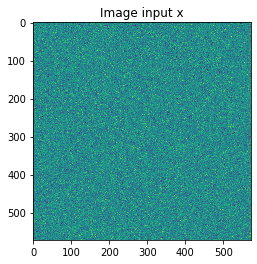

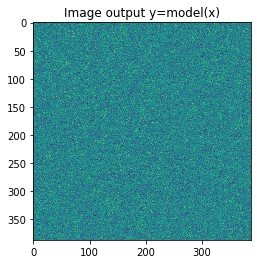

In [21]:
x = x[0,0,:] # only take the first color chanel, of the first sample 
plt.imshow(x)
plt.title("Image input x")
plt.show()
y = y.detach().numpy()[0,0,:] # transform the resulting tensor into a numpy array
plt.imshow(y)
plt.title("Image output y=model(x)")
plt.show()